# Task2 Prediction using Unsupervised ML
### Rakshanda Gade

## STEP-1  Importing Librarires

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

print("Libraries Imported")

Libraries Imported


## STEP-2 Loading Dataset

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

print("Dataset Loaded")
# See the first 5 rows
iris_df.head()

Dataset Loaded


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Shape
iris_df.shape

(150, 4)

In [4]:
#Dataset info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
#Statistical info of Dataset 
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## STEP-3 Calculation find the optimum number of clusters

#### A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.
#### Inertia: It is the sum of squared distances of samples to their closest cluster center.

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.25600931571815]


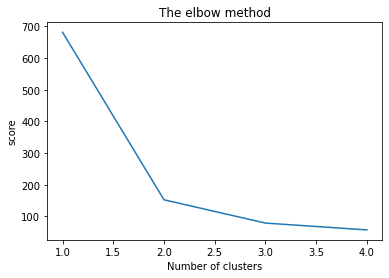

In [6]:
from sklearn.cluster import KMeans

score_1 = [] #WITHIN CLUSTER SUM OF SQUARES
range_values = range(1, 5)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(iris_df.values)
    score_1.append(kmeans.inertia_)
print(score_1)

# Plotting the result, to observe 'The elbow' to calculate optimal number of clusters
plt.plot(range_values, score_1)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.show()   

#### From above diagram, optimal number of clusters is 3

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.25600931571815]


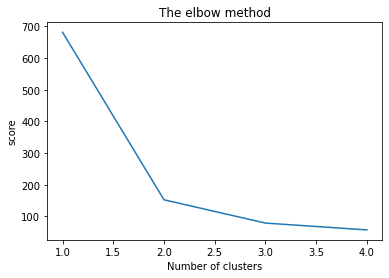

In [7]:
score_2 = [] #WITHIN CLUSTER SUM OF SQUARES

for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_df)
    score_2.append(kmeans.inertia_)
print(score_2)    
   
# Plotting the result, to observe 'The elbow' to calculate optimal number of clusters
plt.plot(range(1, 5), score_2)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.show()

## STEP-4 Creating KMeans classifier

In [8]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_df)

y_kmeans.shape

(150,)

In [9]:
# concatenate the clusters labels to our original dataframe
labels = kmeans.labels_

np.unique(labels)

array([0, 1, 2])

## STEP-5 Plotting Data

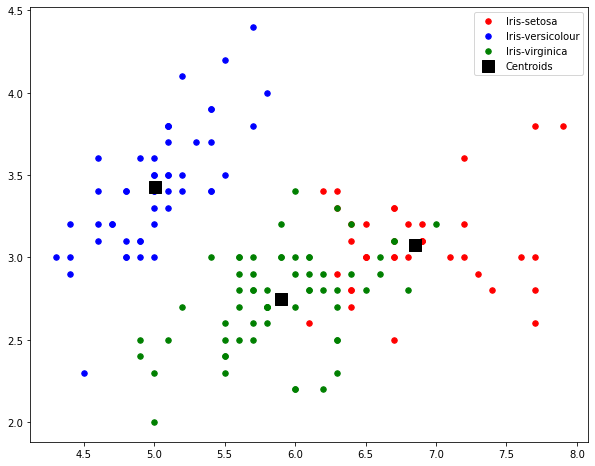

In [10]:
fig = plt.figure()
fig.set_size_inches(10, 8)
plt.scatter(iris_df.values[y_kmeans == 0, 0], iris_df.values[y_kmeans == 0, 1], 
            s = 30, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_df.values[y_kmeans == 1, 0], iris_df.values[y_kmeans == 1, 1], 
            s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris_df.values[y_kmeans == 2, 0], iris_df.values[y_kmeans == 2, 1],
            s = 30, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 150, c = 'black', label = 'Centroids', marker='s')

plt.legend(loc ="upper right")
